In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("insurance.csv")

In [3]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
data.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.shape

(1338, 7)

In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data["age"].max()

64

In [13]:
IQR=data['age'].quantile(0.75)-data['age'].quantile(0.25)
IQR

24.0

In [15]:
lowerBound=data['age'].quantile(0.25)-(1.5*IQR)
lowerBound

-9.0

In [16]:
upperBound=data['age'].quantile(0.75)+(1.5*IQR)
upperBound

87.0

{'whiskers': [<matplotlib.lines.Line2D at 0x137cb0db790>,
 'caps': [<matplotlib.lines.Line2D at 0x137cb39c850>,
 'boxes': [<matplotlib.lines.Line2D at 0x137cb3401d0>],
 'medians': [<matplotlib.lines.Line2D at 0x137cb3b3610>],
 'fliers': [<matplotlib.lines.Line2D at 0x137cb34b490>],
 'means': []}

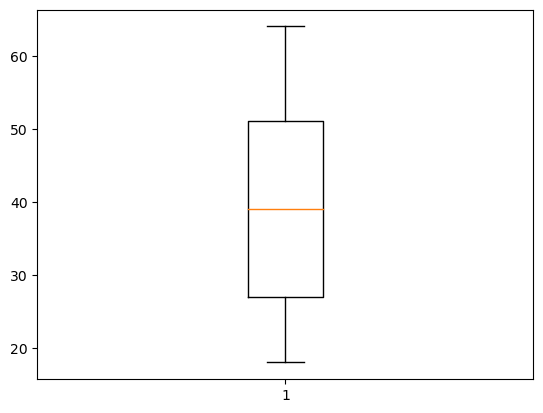

In [17]:
plt.boxplot(data['age'])

<Axes: ylabel='age'>

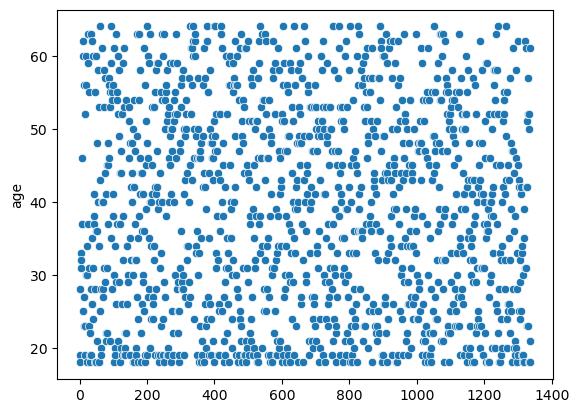

In [18]:
import seaborn as sns
sns.scatterplot(data['age'])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()

In [21]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [23]:
data['sex']=label_encoder.fit_transform(data['sex'])
data['smoker']=label_encoder.fit_transform(data['smoker'])
data['region']=label_encoder.fit_transform(data['region'])

In [24]:
data.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [25]:
x=data.drop(columns=['charges'],axis=1)
y=data['charges']

In [26]:
x

age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]

In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
y.shape

(1338,)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [31]:
x_train.shape

(1070, 6)

In [32]:
y_train.shape

(268, 6)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [41]:
model=LinearRegression()